# Import the necessary libraries

In [1]:
import pandas as pd

# Assign the dataset to the variable named as emp_data

In [2]:
emp_data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

# Read the first five record from the given dataset

In [3]:
emp_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Show the datatype of each column

In [4]:
emp_data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

# Show the column which have datatype only object

In [5]:
emp_data.select_dtypes('object').describe()

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E100581,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


# Show the total no of unique values in empDepartment

In [6]:
emp_data['EmpDepartment'].nunique()

6

# Show the names of unique department in EmpDepartment

In [7]:
emp_data['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

# Count the total no of people in EmpDepartment

In [8]:
emp_data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

# Make the dictonary map for the given dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

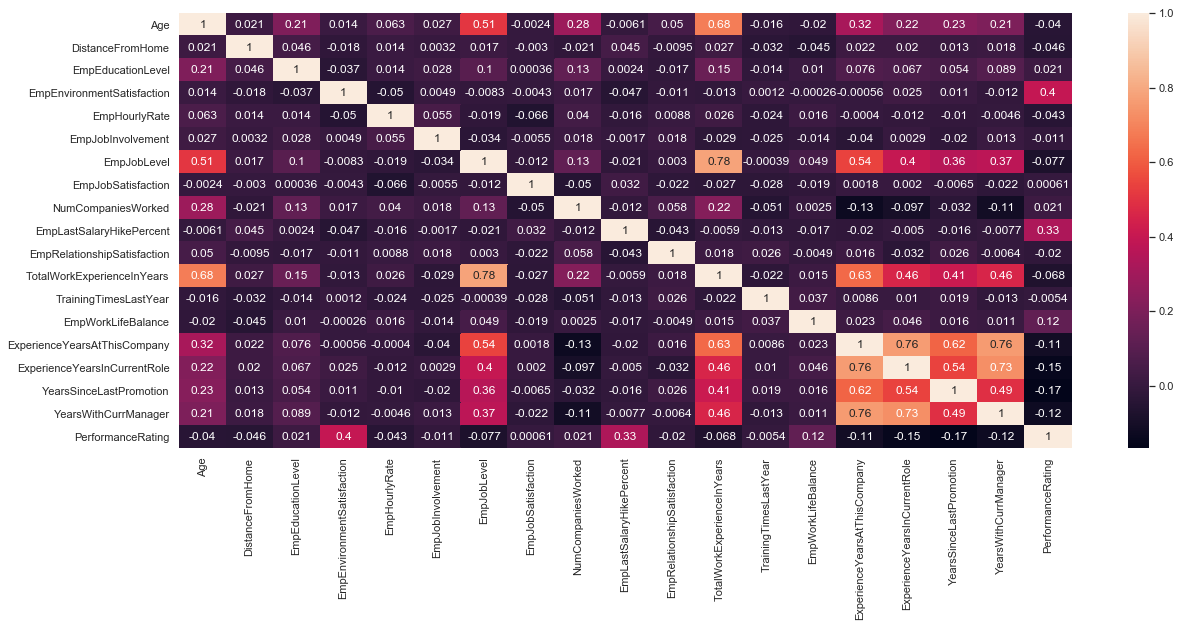

In [11]:
plt.figure(figsize=(20, 8))
sns.heatmap(emp_data.corr(), annot=True)

# Calculate the department wise performances

In [12]:
new_data = emp_data.groupby('EmpDepartment')['PerformanceRating'].value_counts()

In [13]:
new_data

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [14]:
new_data = new_data.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

In [15]:
new_data

EmpDepartment           PerformanceRating
Data Science            3                    85.0
                        4                    10.0
                        2                     5.0
Development             3                    84.0
                        4                    12.0
                        2                     4.0
Finance                 3                    61.0
                        2                    31.0
                        4                     8.0
Human Resources         3                    70.0
                        2                    19.0
                        4                    11.0
Research & Development  3                    68.0
                        2                    20.0
                        4                    12.0
Sales                   3                    67.0
                        2                    23.0
                        4                     9.0
Name: PerformanceRating, dtype: float64

In [16]:
new_data = new_data.reindex([2,3,4], level=1)

# Make the stacked bar chart according to the empDepartment and performanceRating

Text(0.5, 1.0, 'Performance Rating-vs-Department Name')

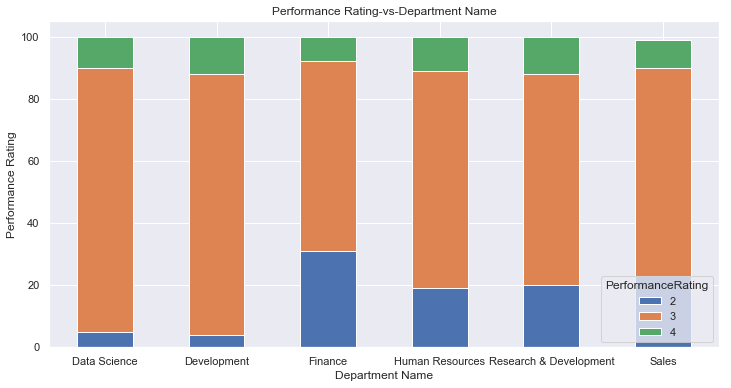

In [17]:
sns.set(rc={'figure.figsize':(12, 6)})
new_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Department Name')
plt.xticks(rotation=0)
plt.ylabel('Performance Rating')
plt.title('Performance Rating-vs-Department Name')

# Make the stacked bar chart according to the performanceRating and empDepartment

In [18]:
new_data = emp_data.groupby('PerformanceRating')['EmpDepartment'].value_counts()

In [19]:
new_data

PerformanceRating  EmpDepartment         
2                  Sales                      87
                   Research & Development     68
                   Finance                    15
                   Development                13
                   Human Resources            10
                   Data Science                1
3                  Development               304
                   Sales                     251
                   Research & Development    234
                   Human Resources            38
                   Finance                    30
                   Data Science               17
4                  Development                44
                   Research & Development     41
                   Sales                      35
                   Human Resources             6
                   Finance                     4
                   Data Science                2
Name: EmpDepartment, dtype: int64

In [20]:
new_data = new_data.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

In [21]:
new_data

PerformanceRating  EmpDepartment         
2                  Sales                     45.0
                   Research & Development    35.0
                   Finance                    8.0
                   Development                7.0
                   Human Resources            5.0
                   Data Science               1.0
3                  Development               35.0
                   Sales                     29.0
                   Research & Development    27.0
                   Human Resources            4.0
                   Finance                    3.0
                   Data Science               2.0
4                  Development               33.0
                   Research & Development    31.0
                   Sales                     27.0
                   Human Resources            5.0
                   Finance                    3.0
                   Data Science               2.0
Name: EmpDepartment, dtype: float64

Text(0.5, 1.0, 'Performance Rating-vs-Department Name')

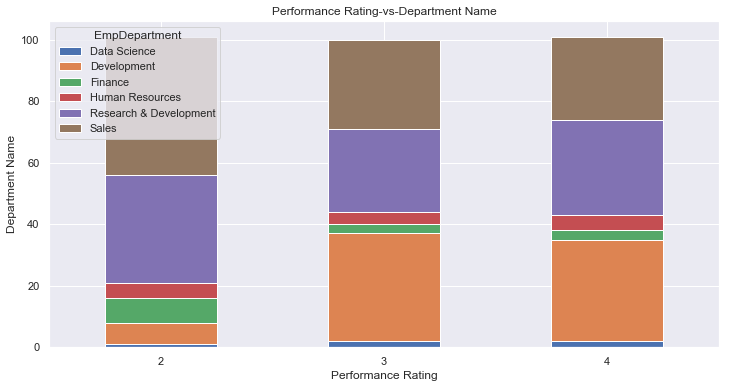

In [22]:
sns.set(rc={'figure.figsize':(12, 6)})
new_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Performance Rating')
plt.xticks(rotation=0)
plt.ylabel('Department Name')
plt.title('Performance Rating-vs-Department Name')

# Apply the decision tree algo to the given dataset

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_model = DecisionTreeClassifier()

In [25]:
training_data = emp_data.copy()

In [26]:
training_data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [27]:
training_data.columns.nunique()

28

In [28]:
training_data.drop('PerformanceRating', axis = 1, inplace=True)

In [29]:
columns = training_data.select_dtypes(include=['int64', 'float64']).columns

In [30]:
columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
training_data = training_data[columns]

In [32]:
training_data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2


In [33]:
training_data.shape

(1200, 18)

In [34]:
output_data = emp_data['PerformanceRating'].copy()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

In [37]:
dt_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predictions = dt_model.predict(x_test)

In [39]:
predictions

array([2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 4, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 4, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       2, 3, 2, 4, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
accuracy_score(predictions, y_test)

0.8666666666666667

# Apply the logistic regression algo to the given dataset

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
predictions = model.predict(x_test)

In [46]:
predictions[:10]

array([2, 2, 3, 3, 3, 3, 3, 3, 3, 4], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(predictions, y_test)

array([[ 25,  19,   1],
       [ 24, 243,  31],
       [  0,   6,  11]], dtype=int64)

In [49]:
score = accuracy_score(predictions, y_test)

In [50]:
score

0.775

# Use SVM algo to the given dataset

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC()

In [53]:
svm_model.fit(X, Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
svm_predictions = svm_model.predict(x_test)

In [55]:
svm_predictions[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [56]:
svm_score = accuracy_score(svm_predictions, y_test)

In [57]:
svm_score

0.7444444444444445

# Use grid search to the svm algo

In [58]:
from sklearn .model_selection import GridSearchCV

In [59]:
svm_parameters = {
    'C' : [0.01, 0.1, 1, 10, 100]
}

In [60]:
grid_search_svm = GridSearchCV(SVC(kernel = 'rbf'), param_grid = svm_parameters)

In [61]:
grid_search_svm.fit(X,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma wil

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [62]:
grid_search_svm.best_params_

{'C': 10}

In [63]:
grid_search_svm.best_score_

0.7238095238095238